In [1]:
from model_controller import ModelPredictController, ModelTrainController
from plotter import Plotter
from glob import glob
from IPython.display import Image

Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
Found GPU at: /device:GPU:0
2.5.0


In [2]:
model = ModelPredictController(NUM_LINHAS=8);

In [3]:
model.load()

building...
total do vocabulario=  179
VOCAB_SIZE 180


In [4]:
def restore_and_predict_for( snapshots):
	results= []
	
	for snap in snapshots:
		print( '-----------', snap)
		model.restoreFromCheckpointName( snap)
		r= model.evaluateForTest('test-8lines', plot_attention=False, _len= 16)
		
		results.append( {
			'snapshot': snap,
			'result': r
		})
	return results
	

In [7]:
		
results = restore_and_predict_for( [
'train_20211026_final_8lines_INCR_LEN__NO_TEACH__HANDWRITTEN_ONLY--dataset-8lines-v002-somente_handwriten',
'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-1',
'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-2',
'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-3',
'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-5',
'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM_ref1_--curriculum-8-linhas--etapa-5',
])

----------- train_20211026_final_8lines_INCR_LEN__NO_TEACH__HANDWRITTEN_ONLY--dataset-8lines-v002-somente_handwriten
restore from pretraining  ../train-folder/checkpoints/train_20211026_final_8lines_INCR_LEN__NO_TEACH__HANDWRITTEN_ONLY--dataset-8lines-v002-somente_handwriten\ckpt-1 ...
target_len=  16
evaluating dataset  test-8lines
evaluating total images:  114 ...
evaluating  0 ...
evaluating  100 ...
--------------< Indice por tamanho de sequencia >----------------------------
len 1 accuracy 0.8421052694320679 cir 0.112573095
len 2 accuracy 0.8070175647735596 cir 0.121345036
len 3 accuracy 0.6695906519889832 cir 0.2563353
len 4 accuracy 0.6776315569877625 cir 0.24141084
len 5 accuracy 0.5894736647605896 cir 0.33304095
len 6 accuracy 0.5701754093170166 cir 0.3420078
len 7 accuracy 0.5150375962257385 cir 0.4135547
len 8 accuracy 0.5 cir 0.4241411
len 9 accuracy 0.4571150243282318 cir 0.47082523
len 10 accuracy 0.4394736886024475 cir 0.48134503
len 11 accuracy 0.40271133184432983 cir 0

In [8]:
results

[{'snapshot': 'train_20211026_final_8lines_INCR_LEN__NO_TEACH__HANDWRITTEN_ONLY--dataset-8lines-v002-somente_handwriten',
  'result': [([0.8421052694320679,
     0.8070175647735596,
     0.6695906519889832,
     0.6776315569877625,
     0.5894736647605896,
     0.5701754093170166,
     0.5150375962257385,
     0.5,
     0.4571150243282318,
     0.4394736886024475,
     0.40271133184432983,
     0.3896198868751526,
     0.3663967549800873,
     0.35213032364845276,
     0.33391812443733215,
     0.3344298303127289],
    'test')]},
 {'snapshot': 'train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-1',
  'result': [([0.7894737124443054,
     0.6885964870452881,
     0.6812865734100342,
     0.6644737124443054,
     0.6526315808296204,
     0.6330409646034241,
     0.6090225577354431,
     0.5756579041481018,
     0.5516569018363953,
     0.5289473533630371,
     0.5039872527122498,
     0.4802631437778473,
     0.46086370944976807,
     0.44172

In [15]:
results[0]['result'][0][0]

[0.8421052694320679,
 0.8070175647735596,
 0.6695906519889832,
 0.6776315569877625,
 0.5894736647605896,
 0.5701754093170166,
 0.5150375962257385,
 0.5,
 0.4571150243282318,
 0.4394736886024475,
 0.40271133184432983,
 0.3896198868751526,
 0.3663967549800873,
 0.35213032364845276,
 0.33391812443733215,
 0.3344298303127289]

In [16]:
for r in results:
    print( r['snapshot'])
    print( r['result'][0][0])

train_20211026_final_8lines_INCR_LEN__NO_TEACH__HANDWRITTEN_ONLY--dataset-8lines-v002-somente_handwriten
[0.8421052694320679, 0.8070175647735596, 0.6695906519889832, 0.6776315569877625, 0.5894736647605896, 0.5701754093170166, 0.5150375962257385, 0.5, 0.4571150243282318, 0.4394736886024475, 0.40271133184432983, 0.3896198868751526, 0.3663967549800873, 0.35213032364845276, 0.33391812443733215, 0.3344298303127289]
train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-1
[0.7894737124443054, 0.6885964870452881, 0.6812865734100342, 0.6644737124443054, 0.6526315808296204, 0.6330409646034241, 0.6090225577354431, 0.5756579041481018, 0.5516569018363953, 0.5289473533630371, 0.5039872527122498, 0.4802631437778473, 0.46086370944976807, 0.441729336977005, 0.4385964870452881, 0.43311402201652527]
train_20211026_curriculum_try2_8lines_INCR_LEN__NO_TEACH__CURRICULUM--curriculum-8-linhas--etapa-2
[0.7368420958518982, 0.6666666865348816, 0.6637426614761353, 0.657

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def name_for( snaps):
    if( snaps.endswith( "ten")):
        return "manuscrita"
    elif( snaps.endswith( "1")):
        return "etapa-1"
    elif( snaps.endswith( "2")):
        return "etapa-2"
    elif( snaps.endswith( "3")):
        return "etapa-3"
    elif( snaps.endswith( "4")): 
        return "etapa-4"
    elif( "ref" in snaps): 
        return "etapa-5-1"
    else: 
        return "etapa-5"


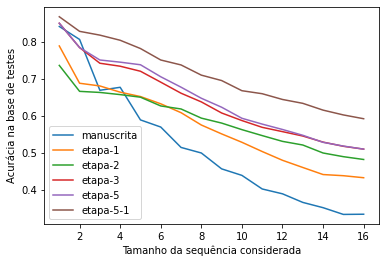

In [34]:
x = [i for i in range(1,16+1)]
legends = []
for r in results:
    legends.append( name_for( r['snapshot']))
    plt.plot(np.array(x), r['result'][0][0])
    
plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('Acurácia na base de testes')
# plt.gca().legend(('sequências reais','curriculum'))
plt.gca().legend(legends)
plt.show()

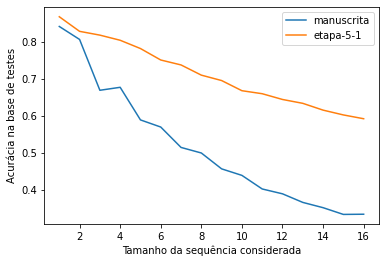

In [35]:
x = [i for i in range(1,16+1)]
legends = []
for r in [results[0], results[-1]]:
    legends.append( name_for( r['snapshot']))
    plt.plot(np.array(x), r['result'][0][0])
    
plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('Acurácia na base de testes')
# plt.gca().legend(('sequências reais','curriculum'))
plt.gca().legend(legends)
plt.show()